In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
pd.set_option('display.max_columns',None)

In [2]:
data= pd.read_csv('XYZCorp_LendingData.txt',sep='\t')

C:\Users\mishr\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (17,45,53) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [94]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [95]:
data[data['pub_rec']==1.0]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
66,1069093,1303740,12500.0,8925.0,8925.0,60 months,17.27,223.11,D,D3,grandma kitchen,5 years,RENT,30000.0,Source Verified,Dec-2011,n,Borrower added on 12/16/11 > So I can pay al...,debt_consolidation,allen,559xx,MN,13.16,0.0,Apr-1995,0.0,NaN,113.0,7.0,1.0,9844.0,70.8,28.0,f,0.00,0.00,5577.750000,5577.75,2812.82,2742.43,0.0,22.5,0.0,Feb-2014,223.11,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
70,1069043,1303486,20975.0,13575.0,13550.0,60 months,17.58,341.63,D,D4,Dollar Tree Stores,5 years,MORTGAGE,44000.0,Verified,Dec-2011,n,Borrower added on 12/18/11 > We are looking ...,credit_card,Refinance Loan,300xx,GA,18.79,0.0,Apr-2000,0.0,NaN,105.0,13.0,1.0,20657.0,79.4,21.0,f,0.00,0.00,18097.344584,18064.10,13575.00,4522.34,0.0,0.0,0.0,Apr-2014,9245.21,NaN,Apr-2014,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
77,1068416,1302799,7250.0,7200.0,7175.0,60 months,21.67,197.51,F,F3,Cross Country Travel Corp,< 1 year,RENT,75000.0,Verified,Dec-2011,n,I have been steadily employed. I am a hard wo...,debt_consolidation,Debt Consolidation Loan,937xx,CA,24.82,0.0,May-2000,2.0,NaN,97.0,9.0,1.0,21706.0,91.2,19.0,f,0.00,0.00,8201.530000,8173.07,7200.00,1001.53,0.0,0.0,0.0,Sep-2012,6824.70,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
94,1068545,1303147,7000.0,7000.0,7000.0,36 months,11.71,231.54,B,B3,Harris,4 years,OWN,39120.0,Not Verified,Dec-2011,n,NaN,debt_consolidation,Emergency Loan,329xx,FL,21.01,0.0,Dec-1996,0.0,26.0,33.0,8.0,1.0,9414.0,52.4,26.0,f,0.00,0.00,7932.300000,7932.30,7000.00,932.30,0.0,0.0,0.0,Jun-2013,4235.03,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
161,1062177,1294027,15000.0,15000.0,15000.0,36 months,17.27,536.81,D,D3,Senior Dental Insurance Solutions,2 years,MORTGAGE,44400.0,Source Verified,Dec-2011,n,NaN,house,home improvement,334xx,FL,3.59,1.0,Jun-1983,0.0,18.0,93.0,6.0,1.0,4582.0,91.6,16.0,f,0.00,0.00,17991.530000,17991.53,15000.00,2991.53,0.0,0.0,0.0,Jun-2013,9412.40,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855959,36421485,39142898,4000.0,4000.0,4000.0,36 months,8.67,126.59,B,B1,Lead Custodian,10+ years,MORTGAGE,50000.0,Verified,Jan-2015,n,NaN,car,Car financing,956xx,CA,12.63,0.0,Sep-2002,0.0,NaN,84.0,11.0,1.0,1700.0,5.6,30.0,f,0.00,0.00,4158.020000,4158.02,4000.00,158.02,0.0,0.0,0.0,Jun-2015,3655.51,NaN,Nov-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,18979.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30100.0,NaN,NaN,NaN,0
855960

In [96]:
data[(data['open_acc']==1.0) &(data['pub_rec']>0.0)]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
137239,4795304,6037491,3500.0,3500.0,3500.0,36 months,21.49,132.75,E,E3,Fairfield Inn/Marriott,10+ years,MORTGAGE,16000.0,Verified,May-2013,n,Borrower added on 04/29/13 > Live in a rural...,other,Septic System,655xx,MO,14.48,0.0,Dec-1998,1.0,36.0,30.0,1.0,1.0,1959.0,97.9,9.0,f,0.00,0.00,4756.429996,4756.43,3500.00,1256.43,0.0,0.0,0.0,Jan-2016,641.18,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,1528.0,1959.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,NaN,NaN,NaN,0
329658,22411615,24744548,3000.0,3000.0,3000.0,36 months,18.99,109.96,E,E1,Abstractor,3 years,RENT,41350.0,Verified,Jul-2014,n,NaN,debt_consolidation,Debt consolidation,357xx,AL,2.44,0.0,Jun-2006,0.0,39.0,106.0,1.0,1.0,1272.0,74.8,8.0,f,1792.02,1792.02,1869.320000,1869.32,1207.98,661.34,0.0,0.0,0.0,Jan-2016,109.96,Jan-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,1272.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1700.0,NaN,NaN,NaN,0
357782,19205676,21408431,8000.0,8000.0,8000.0,36 months,14.99,277.29,C,C5,NaN,NaN,RENT,90000.0,Source Verified,Jun-2014,n,NaN,credit_card,Credit card refinancing,891xx,NV,1.59,0.0,Sep-1984,0.0,NaN,104.0,1.0,1.0,4817.0,74.1,3.0,w,0.00,0.00,8724.690000,8724.69,8000.00,724.69,0.0,0.0,0.0,Jan-2015,7060.95,NaN,Jul-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,4817.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6500.0,NaN,NaN,NaN,0
386069,15340787,17413191,14250.0,14250.0,14250.0,36 months,20.49,533.15,E,E2,Manager,10+ years,OWN,45000.0,Verified,May-2014,n,NaN,home_improvement,Home improvement,315xx,GA,0.80,0.0,Sep-2002,0.0,34.0,10.0,1.0,4.0,6.0,0.2,5.0,w,7409.37,7409.37,10663.000000,10663.00,6840.63,3822.37,0.0,0.0,0.0,Jan-2016,533.15,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2500.0,NaN,NaN,NaN,0
451949,10177714,12029437,12700.0,12700.0,12700.0,36 months,18.25,460.73,D,D3,Business Representative,< 1 year,RENT,120000.0,Verified,Jan-2014,n,NaN,debt_consolidation,Auto Credit Card,917xx,CA,0.25,0.0,Jan-2000,0.0,NaN,69.0,1.0,1.0,294.0,12.8,5.0,f,5019.59,5019.59,11056.320000,11056.32,7680.41,3375.91,0.0,0.0,0.0,Jan-2016,460.73,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,294.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2300.0,NaN,NaN,NaN,0
457834,67375744,72187477,6000.0,6000.0,6000.0,36 months,14.48,206.47,C,C5,Electrician maintenance dept,1 year,RENT,48256.0,Source Verified,Dec-2015,n,NaN,other,Other,430xx,OH,0.62,0.0,Aug-2003,0.0,NaN,16.0,1.0,1.0,1105.0,36.8,6.0,w,6000.00,6000.00,0.000000,0.00,0.00,0.00,0.0,0.0,0.0,NaN,0.00,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,1105.0,0.0,0.0,0.0,0.0,41.0,0.0,NaN,0.0,1.0,1105.0,36.8,3000.0,1.0,0.0,2.0,0


In [97]:
data.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
855964,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,Office Assistant,8 years,RENT,31000.0,Verified,Jan-2015,n,NaN,debt_consolidation,Debt consolidation,905xx,CA,28.69,0.0,Sep-2004,0.0,NaN,77.0,9.0,1.0,14037.0,82.1,15.0,f,7055.47,7055.47,3971.88,3971.88,2944.53,1027.35,0.0,0.0,0.0,Jan-2016,332.10,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,25274.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN,0
855965,36441262,39152692,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,Director of Maintenance,10+ years,MORTGAGE,79000.0,Verified,Jan-2015,n,NaN,home_improvement,Home improvement,072xx,NJ,3.90,0.0,Mar-1974,1.0,26.0,NaN,5.0,0.0,8621.0,84.5,23.0,f,16933.26,16933.26,9532.39,9532.39,7066.74,2465.65,0.0,0.0,0.0,Jan-2016,797.03,Feb-2016,Jan-2016,0.0,29.0,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,140285.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN,0
855966,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,Radiologist Technologist,5 years,RENT,35000.0,Verified,Jan-2015,n,NaN,debt_consolidation,Debt consolidation,378xx,TN,30.90,0.0,Sep-2003,0.0,NaN,84.0,9.0,1.0,11031.0,61.3,22.0,w,11155.50,11155.50,3769.74,3769.74,1844.50,1925.24,0.0,0.0,0.0,Jan-2016,316.07,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,34178.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN,0
855967,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,Painter,1 year,RENT,64400.0,Source Verified,Jan-2015,n,NaN,debt_consolidation,Debt consolidation,010xx,MA,27.19,1.0,Oct-2003,2.0,22.0,NaN,17.0,0.0,8254.0,30.6,20.0,w,10447.31,10447.31,3787.67,3787.67,1552.69,2234.98,0.0,0.0,0.0,Jan-2016,317.86,Feb-2016,Jan-2016,1.0,22.0,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,58418.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN,0
855968,36271262,38982659,20000.0,20000.0,20000.0,36 months,11.99,664.20,B,B5,Manager Hotel Operations Oasis,10+ years,RENT,100000.0,Verified,Jan-2015,n,NaN,credit_card,Credit card refinancing,331xx,FL,10.83,0.0,Dec-2001,1.0,NaN,110.0,8.0,1.0,33266.0,79.8,10.0,f,14110.94,14110.94,7943.76,7943.76,5889.06,2054.70,0.0,0.0,0.0,Jan-2016,664.20,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,33307.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41700.0,NaN,NaN,NaN,0


In [98]:
print(f"The dataframe is having {data.shape[0]} rows.")
print(f"The dataframe is having {data.shape[1]} variables.")

The dataframe is having 855969 rows.
The dataframe is having 73 variables.


In [99]:
#We will Check the null values 
null_df = pd.DataFrame({'Sum':data.isnull().sum(),'Percentage':data.isnull().mean()*100})

In [100]:
null_df[null_df['Sum']>0]

,Sum,Percentage
emp_title,49443,5.776261
emp_length,43061,5.030673
desc,734157,85.769111
title,33,0.003855
mths_since_last_delinq,439812,51.381767
mths_since_last_record,724785,84.674211
revol_util,446,0.052105
last_pymnt_d,8862,1.035318
next_pymnt_d,252971,29.553757
last_credit_pull_d,50,0.005841


In [101]:
#We will remove variables which are having more than 50.0% null values
null_to_be_removed = list(null_df[null_df['Percentage']>50.0].index)

In [102]:
null_to_be_removed

['desc',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m']

In [103]:
data.drop(null_to_be_removed,axis=1,inplace=True)

In [104]:
#There are some of the variable which are of no use we will remove those variables
data.drop(['id','member_id','policy_code'],axis=1,inplace=True)

In [105]:
print(f"The dataframe is having {data.shape[0]} rows.")
print(f"The dataframe is having {data.shape[1]} variables.")

The dataframe is having 855969 rows.
The dataframe is having 49 variables.


Out of these there are some of the important variable for which we will do Data Visualization and try to find some insights.
1. Loan_amnt
2. term
3. int_rate
4. emp_length
5. annual_inc
6. home_ownership
7. issue_d

In [106]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,n,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0


In [15]:
#Now we will create two new columns which will have month and year for the loan issue
def Month(x):
    return x.split('-')[0]


def Year(x):
    return x.split('-')[1]


data['Month'] = data.issue_d.apply(Month)
data['Year'] = data.issue_d.apply(Year)

In [108]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,Month,Year
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,Dec,2011
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1,Dec,2011
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,Dec,2011
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,Dec,2011
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,n,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,Dec,2011


### loan_amnt

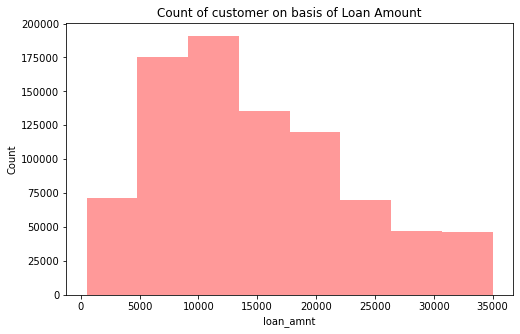

In [17]:
plt.figure(figsize=(8,5))
sns.distplot(a=data['loan_amnt'],kde=False,bins=8,color='red')
plt.title('Count of customer on basis of Loan Amount')
plt.ylabel('Count')
plt.show()

1. From this histogram we can see that there are high number of customers who have loan amount range 5000 to 15000. 

2. There is almost same number of customers who have applied for loan amount of 0 to 5000 and 21000 to 26000. 

3. After 26000 there is a decrease in number of customers who applied for loan.

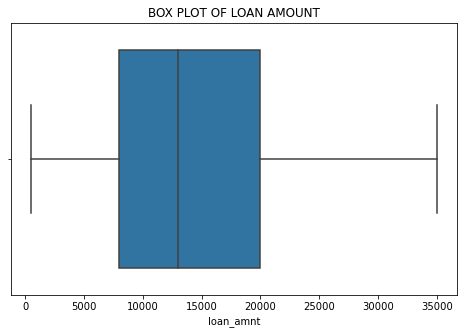

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(x='loan_amnt',data=data)
plt.title('BOX PLOT OF LOAN AMOUNT')
plt.show()

1. There is no outlier in the variable.
2. The median value lies around 12500-13000.
3. There is a big difference in the range of min and 25% value and 75% value and maximum value, this means more customers are in the range of 75% and maximum value.

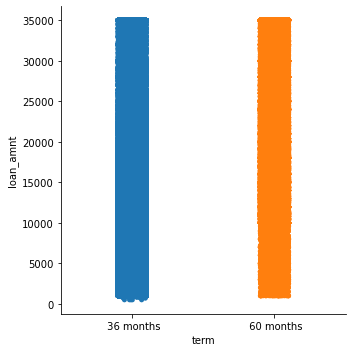

In [19]:
#We will see whether loan amount is having any sort of relation with term
sns.catplot(x='term',y='loan_amnt',data=data)

It does not seems that there is no difference in the loan amount wrt the term.

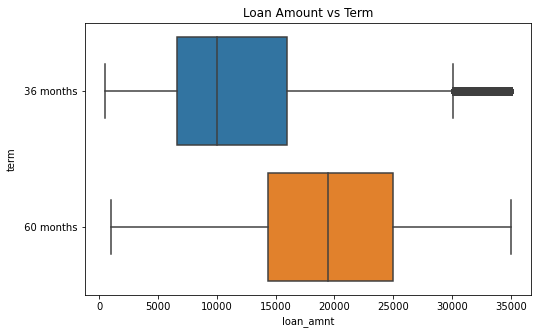

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(x='loan_amnt',y='term',data=data)
plt.title('Loan Amount vs Term')
plt.show()

1. The median of the loan amount who have taken it for 60 months is around 19000 and while who have taken it for 36 months is having median of around 10000.
2. There are some outliers in the loan amount who have opted for 36 months.

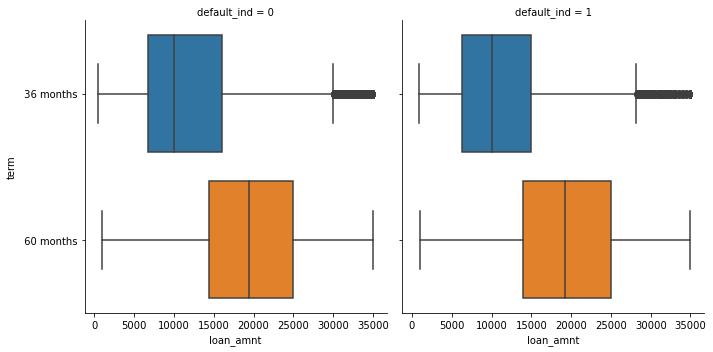

In [58]:
sns.catplot(x='loan_amnt',y='term',col='default_ind',data=data,kind='box')
plt.show()

There is not much of the difference in the median of loan amount for 36 month as well as 60 month for defaulter and non-defaulter. So loan amount and term combined do not play any role in default and no-default.

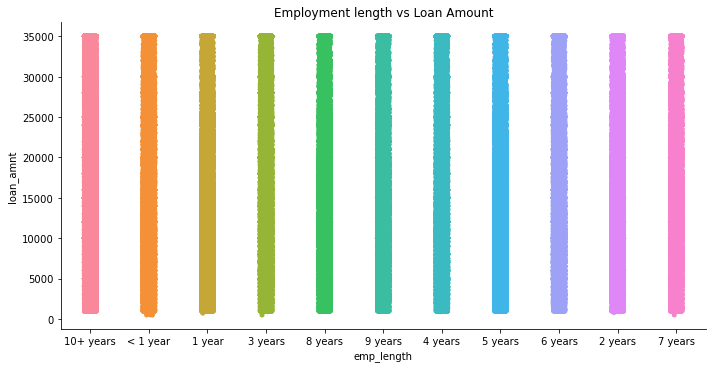

In [21]:
#We will check whether there is any difference in the employment length and loan amount
sns.catplot(x='emp_length',y='loan_amnt',data=data,aspect=2)
plt.title('Employment length vs Loan Amount')
plt.show()

The minumum value for the 10+ years category customers are high among all other. 

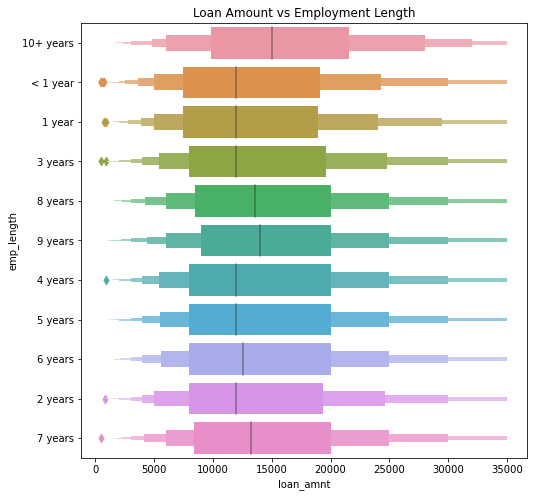

In [22]:
plt.figure(figsize=(8,8))
sns.boxenplot(x='loan_amnt',y='emp_length',data=data)
plt.title('Loan Amount vs Employment Length')
plt.show()

The median value for every category is different, the median of customers who have 10+ years of experience is highest

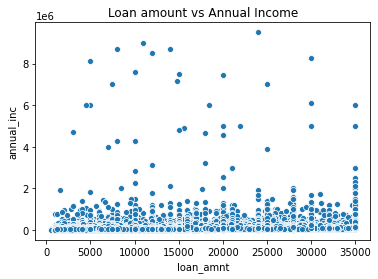

In [23]:
sns.scatterplot(x=data['loan_amnt'],y=data['annual_inc'])
plt.title('Loan amount vs Annual Income')
plt.show()

There does not seems any relation between loan amount and annual income

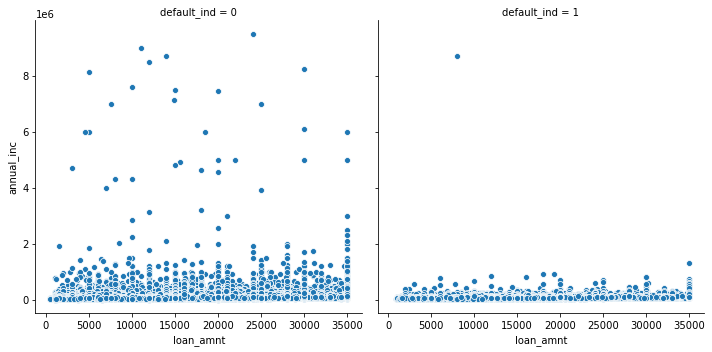

In [63]:
sns.relplot(x='loan_amnt',y='annual_inc',col='default_ind',data=data)
plt.show()

There is only one record who is having a high income and low loan amount and has been in the cateogory of defaulter.

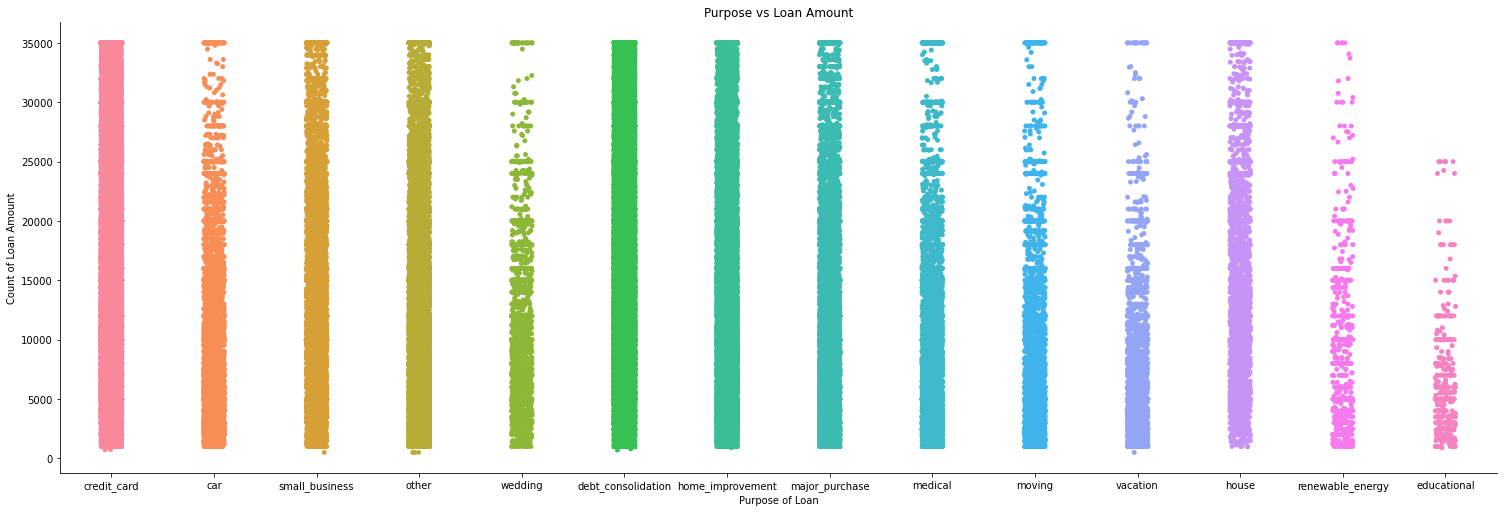

In [7]:
#We will check whether the purpose of loan puts any impact on the loan amount
purpose = sns.catplot(x='purpose',y='loan_amnt',data=data,height=7,aspect=3)
plt.xlabel('Purpose of Loan')
plt.ylabel('Count of Loan Amount')
plt.title('Purpose vs Loan Amount')
plt.show()

The loan amount depends a lot on purpose
1. The people who have opted loan for educational purpose,there are very few customers whose loan amount is more 10000. 
2. The loan amount for renewable_energy, weeding, car,medical, moving, vacation is dense in less amount when it moves to higher price there are very few records.
3. debt_consolidation, credit card are having wide range of records for all the range of loan amount

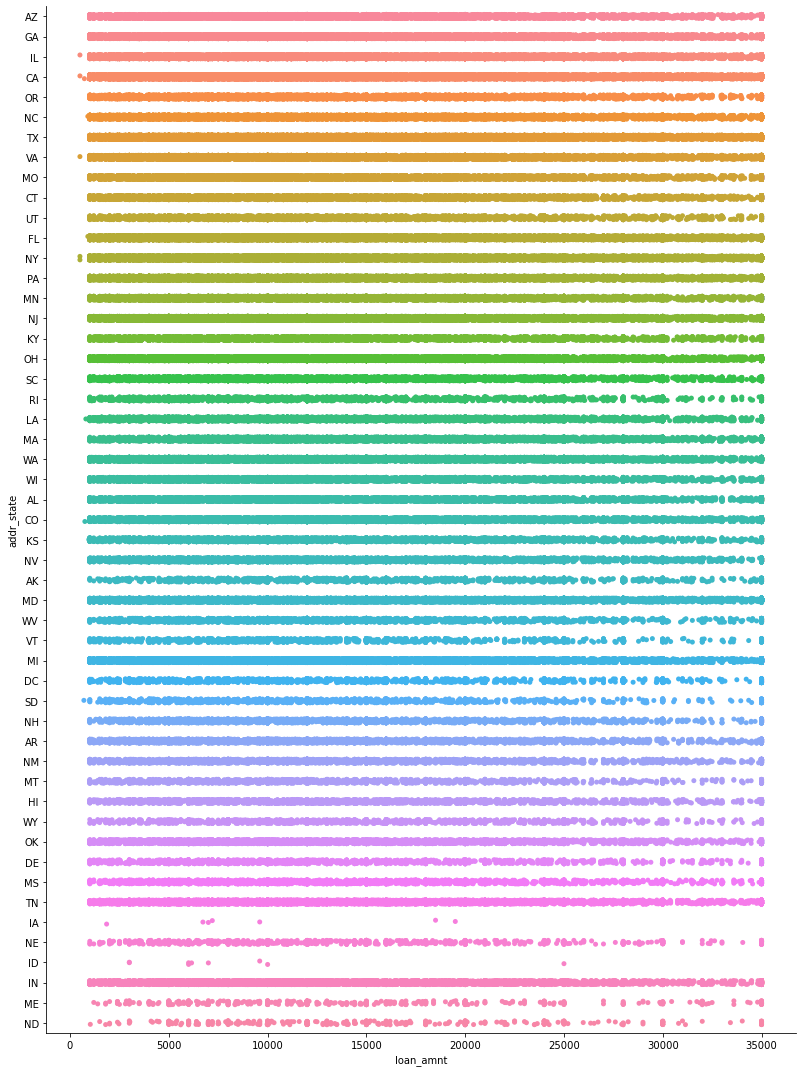

In [25]:
#We will check whether the state is responsible for loan amount
sns.catplot(x='loan_amnt',y='addr_state',data=data,height=15,aspect=0.75)

This is clear that there is differnce in records of every state
1. IA and ID states have minimum number of records.
2. NE, ME, ND are the states which are having very few records. 
3. AZ,GA, IL, CA, VA, MI, TX, FL, NY are the states which are having highest number of records.

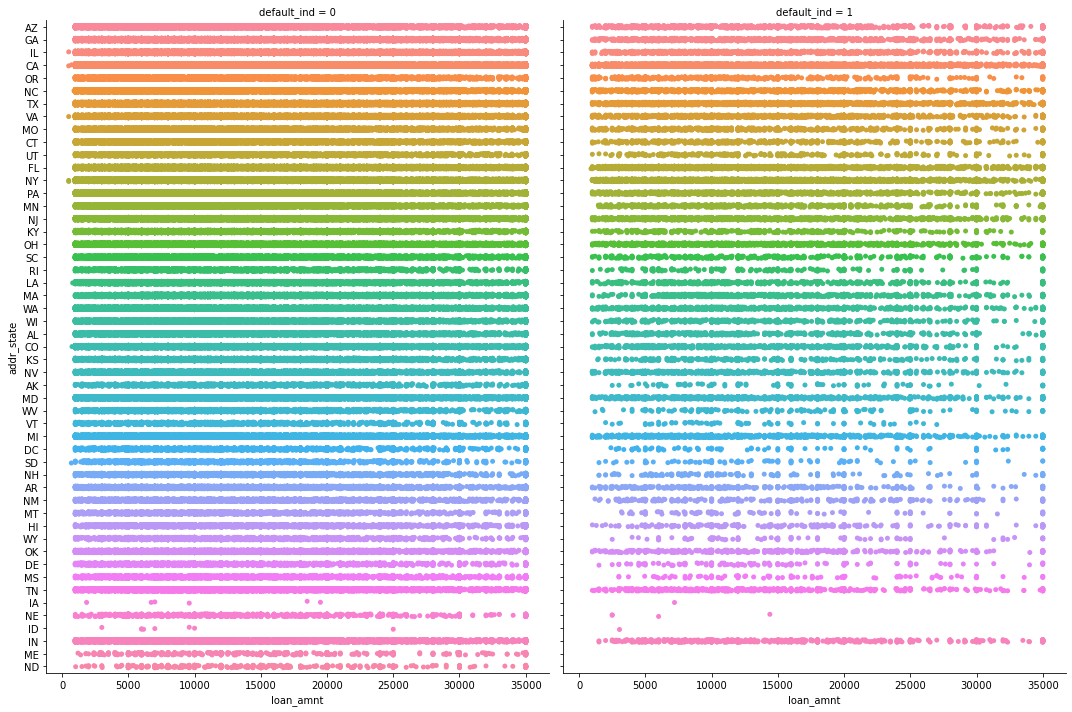

In [54]:
#WE will find whether there is a relation between state and the loan amount.
sns.catplot(x='loan_amnt',y='addr_state',data=data,col='default_ind',height=10,aspect=0.75)
plt.show()

1. There are no defaulters in ME and ND state
2. There are very few from ID, NE, IA
3. Comparatively people who have high loan amount have paid their loan while people who have less loan amount are defaulters.

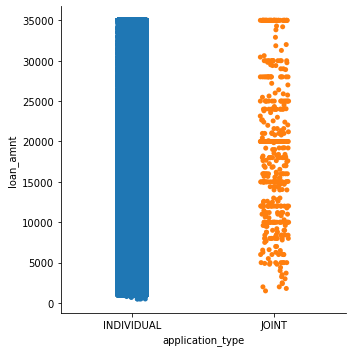

In [26]:
#We will see how loan amount varies with respect to application type.
sns.catplot(x='application_type',y='loan_amnt',data=data)

There is no difference between range of the loan amount wrt application_type

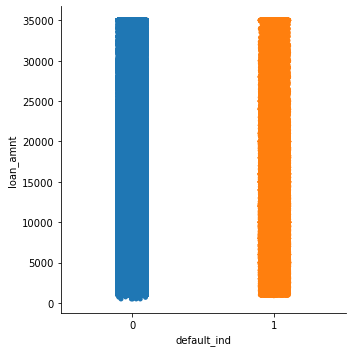

In [27]:
#We will now see whether loan amount shows any relation with defualt_ind
sns.catplot(x='default_ind',y='loan_amnt',data=data)

There is no difference between range of loan amount on basis of default or not.

In [28]:
data[['loan_amnt','default_ind']].corr()

,loan_amnt,default_ind
loan_amnt,1.000000,-0.004907
default_ind,-0.004907,1.000000


There is no such correlation between loan amount and the default_ind but later we will try to see some of the different techniques in feature selection steps.

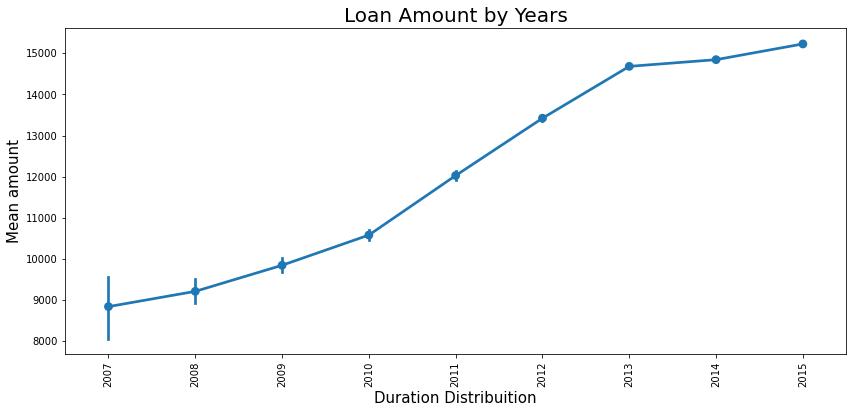

In [110]:
#We will now check in which year the maximum loan was given
plt.figure(figsize = (14,6))

g = sns.pointplot(x='Year', y='loan_amnt',data=data)


g.set_xticklabels(g.get_xticklabels(),rotation=90)

g.set_xlabel("Duration Distribuition", fontsize=15)
g.set_ylabel("Mean amount", fontsize=15)

g.set_title("Loan Amount by Years", fontsize=20)

plt.show()

The maximum amount was given in the year 2015

In [111]:
data.Month.value_counts()

Oct    109565
Jul     92928
Nov     86141
Aug     74796
Dec     70584
Apr     68057
May     65934
Jun     61874
Sep     60808
Jan     60763
Mar     54297
Feb     50222
Name: Month, dtype: int64

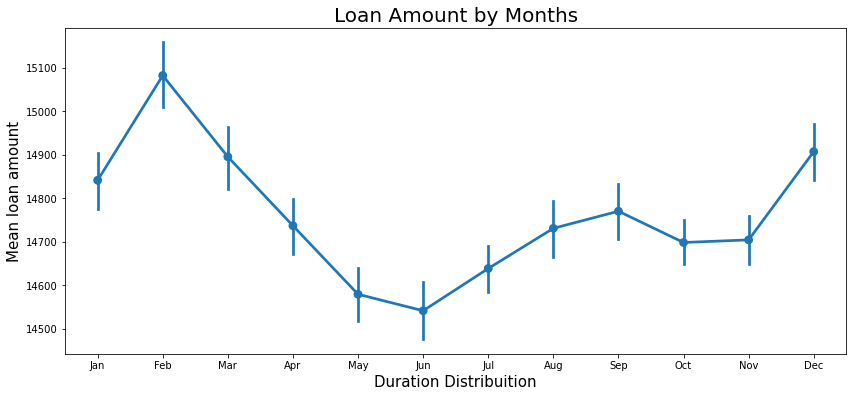

In [25]:
#We will now check in which month the maxmum loan was given
order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.figure(figsize = (14,6))
g = sns.pointplot(x='Month', y='loan_amnt',data=data,order=order)
g.set_xlabel("Duration Distribuition", fontsize=15)
g.set_ylabel("Mean loan amount", fontsize=15)
g.set_title("Loan Amount by Months", fontsize=20)
plt.show()

1. The maximum loan amount was given in Feb
2. Least Loan amount was given in Jun

<Figure size 1008x432 with 0 Axes>

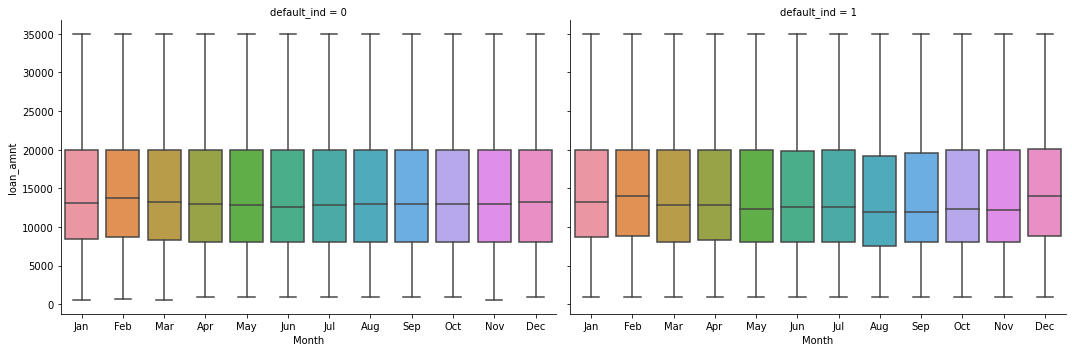

In [116]:
#We will now check in which month the maxmum loan was given
order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.figure(figsize = (14,6))

g = sns.catplot(x='Month', y='loan_amnt',data=data,order=order,col='default_ind', aspect=1.5, kind='box')
plt.show()

### term

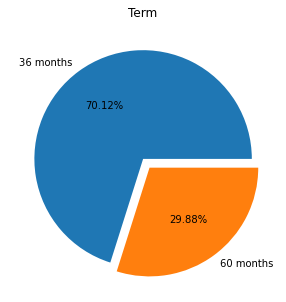

In [37]:
count = data['term'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(x=count,labels=['36 months','60 months'],autopct='%1.2f%%',explode=[0,0.1])
plt.title('Term')
plt.show()

More than 70% of the records belong to the 36 month term and less than 30% belong to 60 months term.

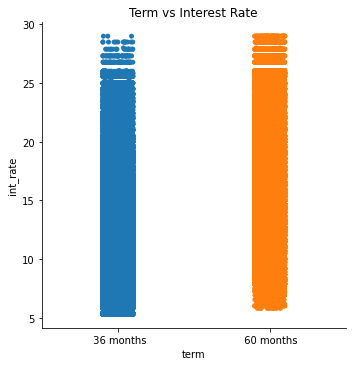

In [30]:
sns.catplot(x='term',y='int_rate',data=data)
plt.title('Term vs Interest Rate')
plt.show()

1. There are less records which are having 36 months terms and interest rate of more than 25%
2. As the interest rate increases the customers opt for 60 months term period.

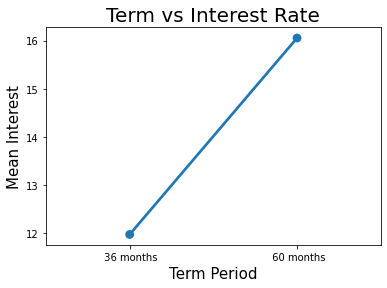

In [13]:
int_and_term=sns.pointplot(x='term',y='int_rate',data=data)
int_and_term.set_xlabel('Term Period', fontsize=15)
int_and_term.set_ylabel('Mean Interest',fontsize=15)
int_and_term.set_title('Term vs Interest Rate', fontsize=20)
plt.show()

As the customer opt for bigger term period the mean interset rate also increases.

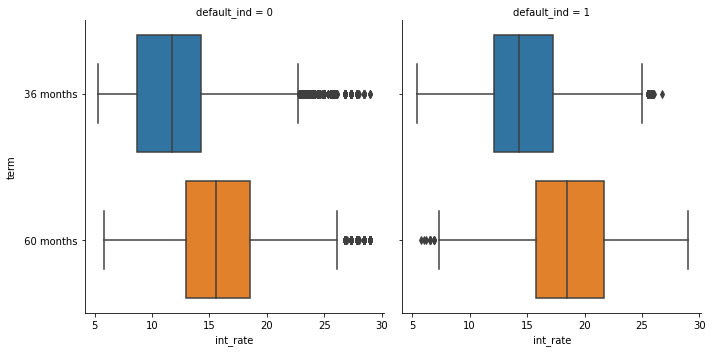

In [56]:
sns.catplot(x='int_rate',y='term',col='default_ind',data=data,kind='box')
plt.show()

The median of interest rate for 30 and 60 months both is less for non-defaulters in comparison. This tells us the interest rate can be cause for the defaulters.

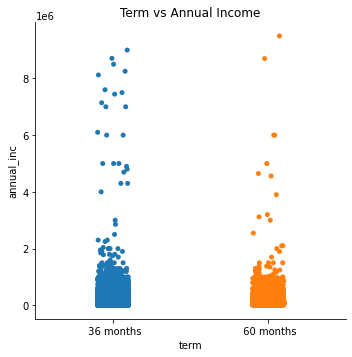

In [32]:
sns.catplot(x='term',y='annual_inc',data=data)
plt.title('Term vs Annual Income')
plt.show()

Majority of the customers who have more than 2000000 annual income opted for 36 months term period.


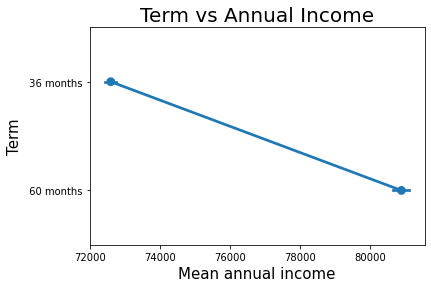

In [12]:
term_income = sns.pointplot(x='annual_inc',y='term',data=data)
term_income.set_xlabel('Mean annual income',fontsize=15)
term_income.set_ylabel('Term',fontsize=15)
term_income.set_title('Term vs Annual Income',fontsize=20)
plt.show()

This point graph shows that there is relation between annual_inc and term.

In [35]:
#We will check how the purpose is related to term period
pd.crosstab(index=data['purpose'],columns=data['term'],margins=True, normalize=True)

term,36 months,60 months,All
purpose,,,
car,0.007881,0.002158,0.010039
credit_card,0.170887,0.062935,0.233822
debt_consolidation,0.397184,0.193249,0.590433
educational,0.000362,0.000019,0.000381
home_improvement,0.040417,0.017945,0.058362
house,0.002888,0.001216,0.004104
major_purchase,0.014642,0.004736,0.019378
medical,0.007801,0.001771,0.009572
moving,0.005205,0.000824,0.006028


For each and every category majority of loans are under 36 months term.

In [36]:
#We will check whether the term is related to application type
pd.crosstab(index=data['application_type'],columns=data['term'])

term,36 months,60 months
application_type,,
INDIVIDUAL,600009,255518
JOINT,212,230


There are records for all the four columns. 

In [37]:
#Now we will check how term is related to default_ind
pd.crosstab(index=data['default_ind'],columns=data['term'], normalize=True, margins=True)

term,36 months,60 months,All
default_ind,,,
0,0.666406,0.279308,0.945714
1,0.034812,0.019474,0.054286
All,0.701218,0.298782,1.000000


1. The people who have paid loan are 94.5% and out of them 66.6% have opted for 36 month term.
2. There are 5.4% records who have not paid loan amount, out of them 3.4% have opted for 36 month term. 

### int_rate

In [38]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,n,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0


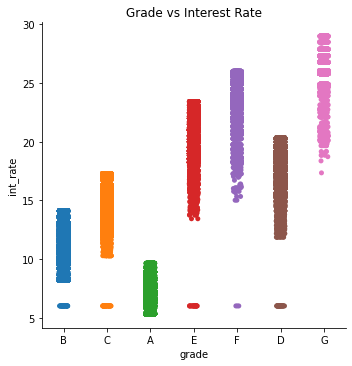

In [39]:
#We will see that is there any relation of grade and interest rate
sns.catplot(x='grade',y='int_rate',data=data)
plt.title('Grade vs Interest Rate')
plt.show()

1. This is very clear that grade depends on interest rate
2. There is no record for G grade which is having less han 15% interest rate.
3. As the grade icreases the range of interest range also increases.
4. There are very few records havig G grade.

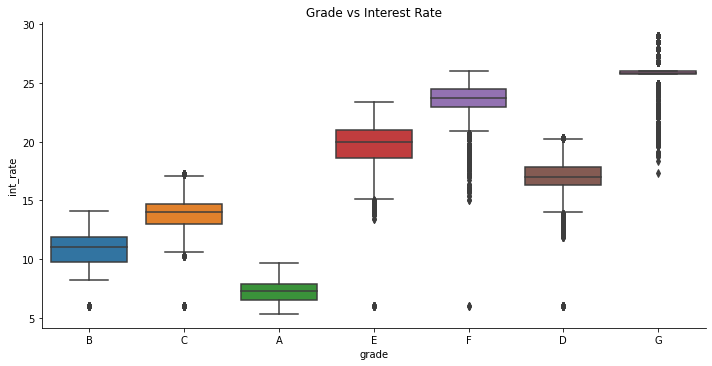

In [3]:
sns.catplot(x='grade',y='int_rate',data=data,kind='box',aspect=2)
plt.title('Grade vs Interest Rate')
plt.show()

The median of A is least and for G is highest

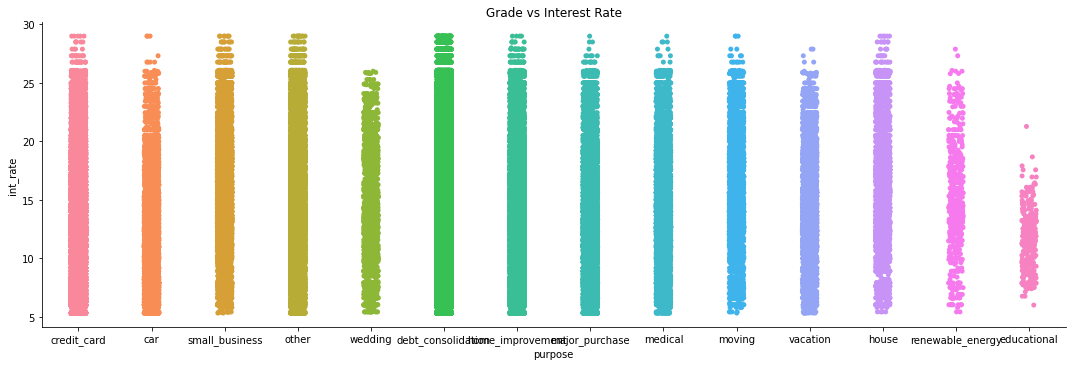

In [41]:
#We will see that is there any relation between purpose and interest rate
sns.catplot(x='purpose',y='int_rate',data=data,aspect=3)
plt.title('Grade vs Interest Rate')
plt.show()

1. The interest rate for education purpose is very less.
2. car, wedding, medical, moving, vacation these purpose are having very few records whose interest rate is more than 25%
3. debt_consolidation, other, improvement, credit card is having high records where interset rate is more than 25%

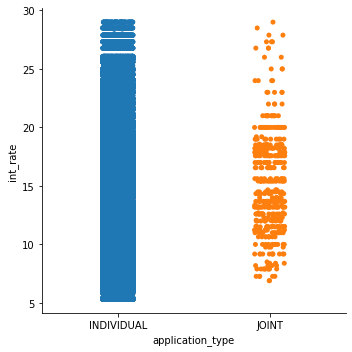

In [42]:
#We will check whether interest rate is related to application_type
sns.catplot(x='application_type',y='int_rate',data=data)

The minimum value of interest rate is for individual. 

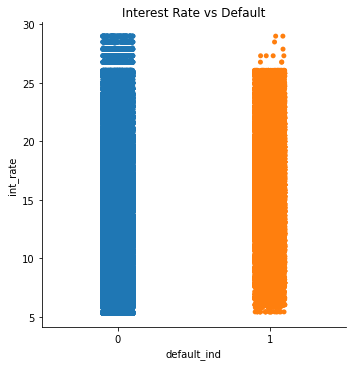

In [43]:
#We will check whether interest rate is related to default
sns.catplot(x='default_ind',y='int_rate',data=data)
plt.title('Interest Rate vs Default')
plt.show()

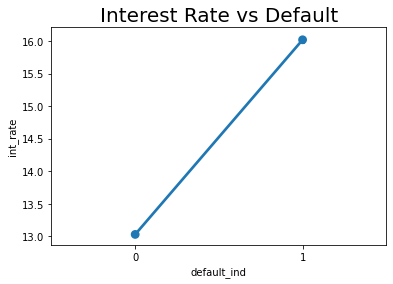

In [11]:
#We will check whether interest rate is related to default
default_int = sns.pointplot(x='default_ind',y='int_rate',data=data)
plt.title('Interest Rate vs Default',fontsize=20)
plt.show()

The mean for int_rate wrt paid loan is less than not paid.

### emp_length

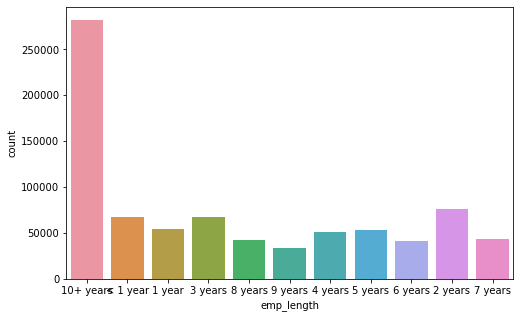

In [45]:
plt.figure(figsize=(8,5))
sns.countplot(x =data['emp_length'])

Maximum number of records have 10+ years of experience, least is of 9 years. 

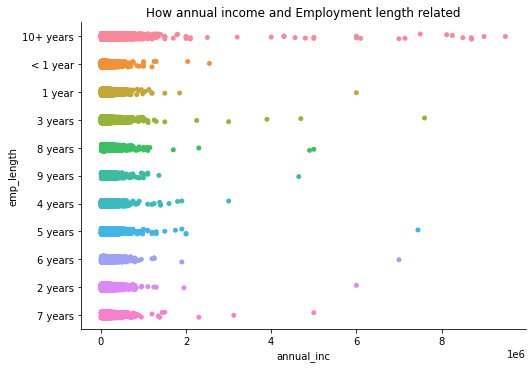

In [47]:
#We will try to see how the emp_length is acting with restpect to annual_inc
sns.catplot(x='annual_inc',y='emp_length',data=data, aspect = 1.5)
plt.title('How annual income and Employment length related')
plt.show()

1. The highest salary is offerd to the person having working experience of 10+ years.
2. If we look there are two records in < 1 years of emp_length which are having more annual_inc then 1 year, there are some outliers in the 3 years, 1 year of emp_length.

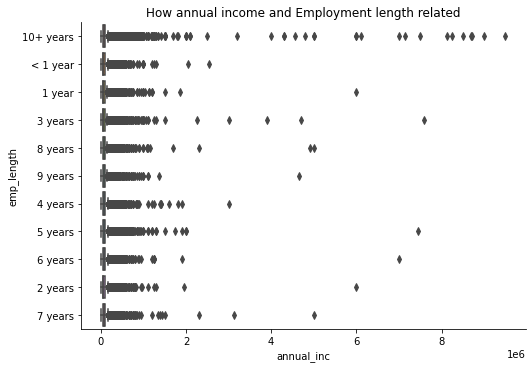

In [50]:
sns.catplot(x='annual_inc',y='emp_length',data=data, aspect = 1.5, kind='box')
plt.title('How annual income and Employment length related')
plt.show()

Looking at the median is very difficult as the data is having a lot of outliers, so predicting relation is difficult. 

This shows that there is a positive trend in the income as the employment length increases

In [56]:
#We will now check how the emp_length is related to the default_ind
pd.crosstab(index=data['emp_length'],columns=data['default_ind'],normalize=True, margins=True)

default_ind,0,1,All
emp_length,,,
1 year,0.063717,0.003763,0.067480
10+ years,0.330397,0.016617,0.347013
2 years,0.088407,0.005067,0.093474
3 years,0.078427,0.004475,0.082902
4 years,0.058804,0.003495,0.062299
5 years,0.062162,0.004035,0.066197
6 years,0.047592,0.003393,0.050985
7 years,0.049859,0.003288,0.053147
8 years,0.049445,0.002740,0.052184


More than 34% of the records belong to the emp_length of 10+ years. In all the categories the maximum number of people have paid the loan.

### annual_inc

In [71]:
data.tail()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
855964,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,Office Assistant,8 years,RENT,31000.0,Verified,Jan-2015,n,debt_consolidation,Debt consolidation,905xx,CA,28.69,0.0,Sep-2004,0.0,9.0,1.0,14037.0,82.1,15.0,f,7055.47,7055.47,3971.88,3971.88,2944.53,1027.35,0.0,0.0,0.0,Jan-2016,332.10,Feb-2016,Jan-2016,0.0,INDIVIDUAL,0.0,0.0,25274.0,17100.0,0
855965,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,Director of Maintenance,10+ years,MORTGAGE,79000.0,Verified,Jan-2015,n,home_improvement,Home improvement,072xx,NJ,3.90,0.0,Mar-1974,1.0,5.0,0.0,8621.0,84.5,23.0,f,16933.26,16933.26,9532.39,9532.39,7066.74,2465.65,0.0,0.0,0.0,Jan-2016,797.03,Feb-2016,Jan-2016,0.0,INDIVIDUAL,0.0,0.0,140285.0,10200.0,0
855966,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,Radiologist Technologist,5 years,RENT,35000.0,Verified,Jan-2015,n,debt_consolidation,Debt consolidation,378xx,TN,30.90,0.0,Sep-2003,0.0,9.0,1.0,11031.0,61.3,22.0,w,11155.50,11155.50,3769.74,3769.74,1844.50,1925.24,0.0,0.0,0.0,Jan-2016,316.07,Feb-2016,Jan-2016,0.0,INDIVIDUAL,0.0,0.0,34178.0,18000.0,0
855967,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,Painter,1 year,RENT,64400.0,Source Verified,Jan-2015,n,debt_consolidation,Debt consolidation,010xx,MA,27.19,1.0,Oct-2003,2.0,17.0,0.0,8254.0,30.6,20.0,w,10447.31,10447.31,3787.67,3787.67,1552.69,2234.98,0.0,0.0,0.0,Jan-2016,317.86,Feb-2016,Jan-2016,1.0,INDIVIDUAL,0.0,0.0,58418.0,27000.0,0
855968,20000.0,20000.0,20000.0,36 months,11.99,664.20,B,B5,Manager Hotel Operations Oasis,10+ years,RENT,100000.0,Verified,Jan-2015,n,credit_card,Credit card refinancing,331xx,FL,10.83,0.0,Dec-2001,1.0,8.0,1.0,33266.0,79.8,10.0,f,14110.94,14110.94,7943.76,7943.76,5889.06,2054.70,0.0,0.0,0.0,Jan-2016,664.20,Feb-2016,Jan-2016,0.0,INDIVIDUAL,0.0,0.0,33307.0,41700.0,0


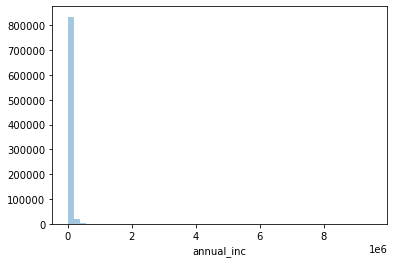

In [58]:
sns.distplot(data['annual_inc'],kde=0)

More than 90% of the customers have less than 1000000 annual income. 

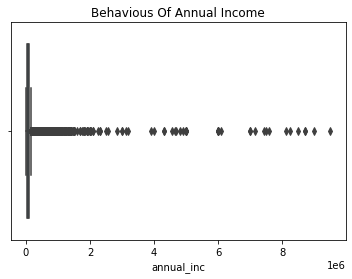

In [59]:
sns.boxplot(data['annual_inc'])
plt.title('Behavious Of Annual Income')
plt.show()

There are alot of outliers

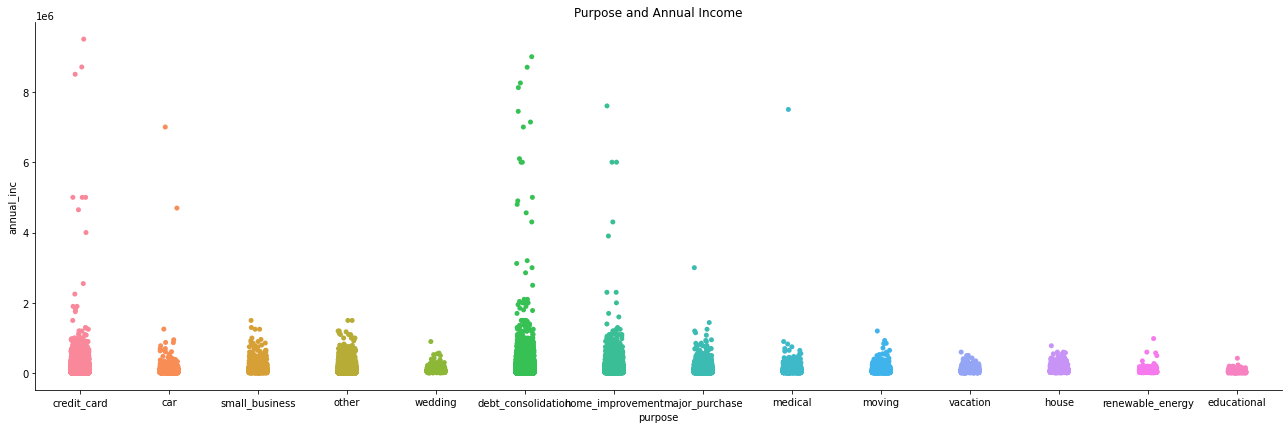

In [47]:
#We will try to see is there any relation of annual_inc and purpose of loan
sns.catplot(x='purpose',y='annual_inc',data=data,height=6,aspect=3)
plt.title('Purpose and Annual Income')
plt.show()

1. The customers who have opted for educational loan have the least annual income. 
2. The customers who have opted for credit card, debt consolidation, improvement have higher income in compaison to all other.

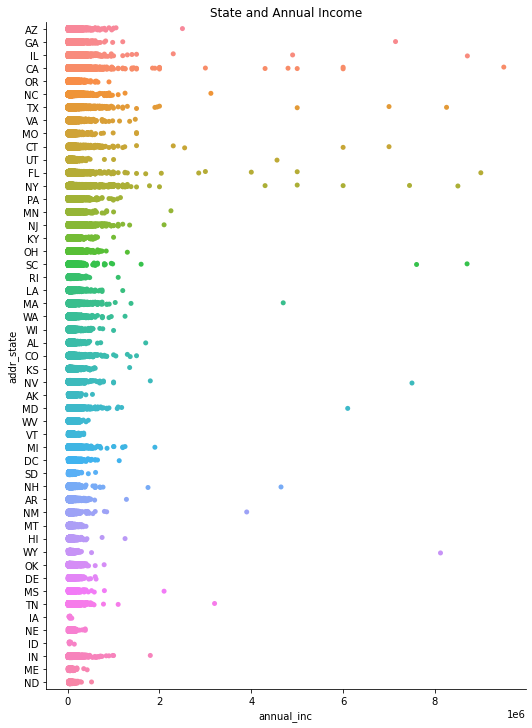

In [49]:
#WE will find whether there is a relation between state and the annual income.
sns.catplot(x='annual_inc',y='addr_state',data=data,height=10,aspect=0.75)
plt.title('State and Annual Income')
plt.show()

There are some states like ND, ME, IA, NE, ID, OK and some more where highest income is less than 1000000.

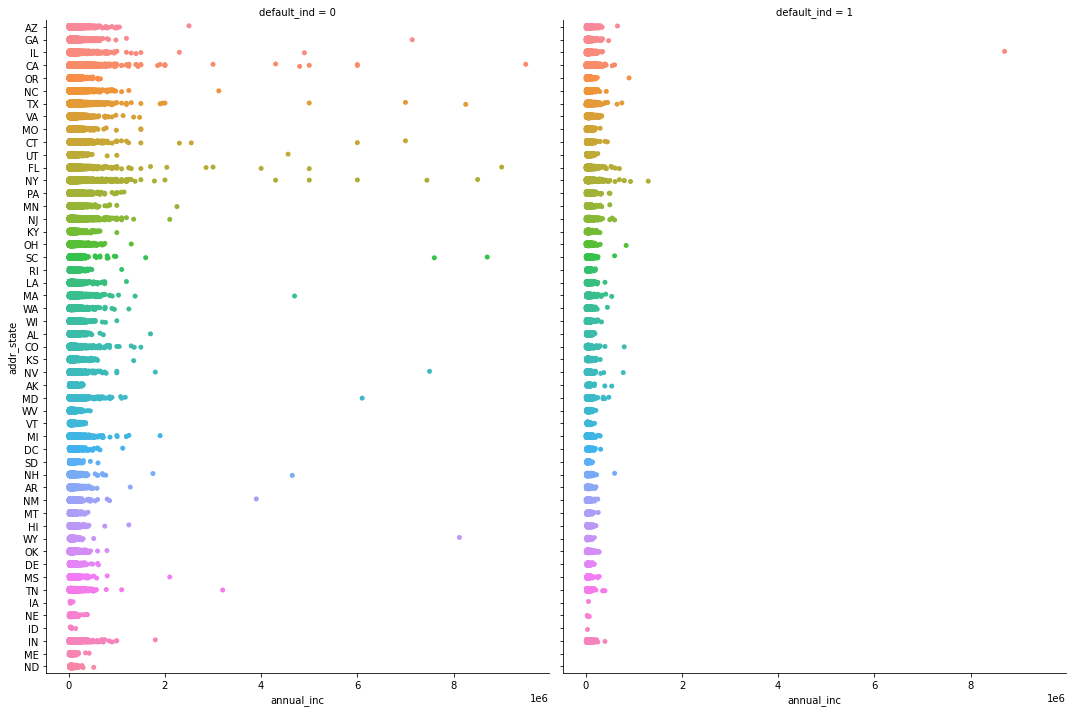

In [53]:
#WE will find whether there is a relation between state and the annual income.
sns.catplot(x='annual_inc',y='addr_state',data=data,col='default_ind',height=10,aspect=0.75)
plt.show()

1. The records who have income very less have not paid their loan.
2. All the records beloning to ME and ND have paid their loan.

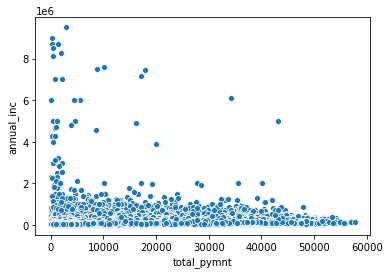

In [68]:
sns.scatterplot(x='total_pymnt',y='annual_inc',data=data)

There are some records which have very less total_pymnr and very high income. These are the cases whose due date is not completed. So considering such cases can be dangerous for the model.

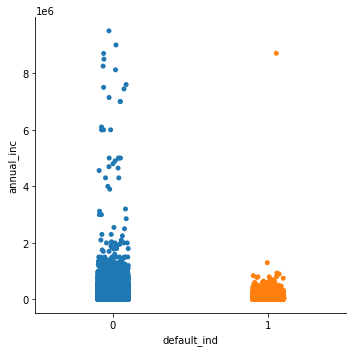

In [72]:
#We will now check is there any relation betweem annualincome and loan defaulter
sns.catplot(x='default_ind',y='annual_inc',data=data)

This is very clear that person who have high income have less chances of loan defaulting.

### home_ownership

In [120]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,Month,Year
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,Dec,2011
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1,Dec,2011
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,Dec,2011
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,Dec,2011
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,n,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,Dec,2011


In [131]:
print(data.home_ownership.value_counts())
print(data.home_ownership.value_counts().index)

MORTGAGE    429106
RENT        342535
OWN          84136
OTHER          144
NONE            45
ANY              3
Name: home_ownership, dtype: int64
Index(['MORTGAGE', 'RENT', 'OWN', 'OTHER', 'NONE', 'ANY'], dtype='object')


Text(0.5, 1.0, 'Frequency of Home Ownership')

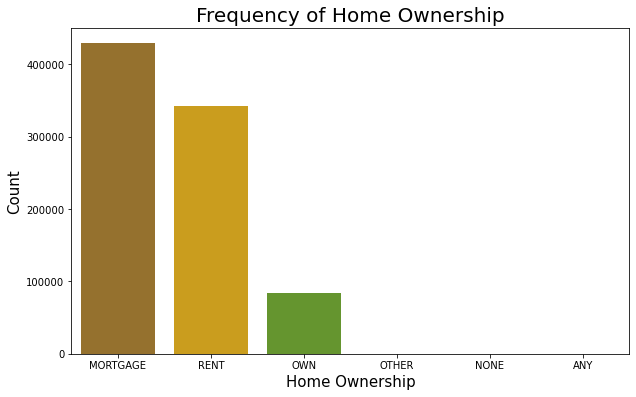

In [136]:
plt.figure(figsize=(10,6))
home = sns.countplot(x='home_ownership',data=data,palette="Dark2_r",order=data.home_ownership.value_counts().index)
home.set_xlabel('Home Ownership',fontsize=15)
home.set_ylabel('Count', fontsize=15)
home.set_title('Frequency of Home Ownership',fontsize=20)

The maximum record belong to Mortrage and Rent category. The records of Any, None and Other are almost negligible in comparison to other.

Text(0.5, 1.0, 'Loan Amount vs Home Ownership')

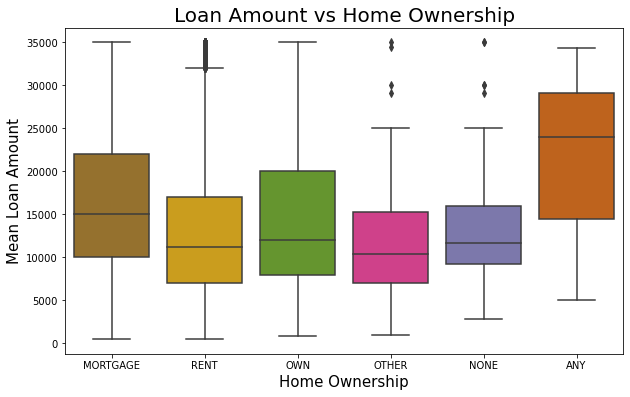

In [138]:
#We will check whether home ownership is having any link with loan amount
plt.figure(figsize=(10,6))
home = sns.boxplot(x='home_ownership',y='loan_amnt',data=data,palette="Dark2_r"
                     ,order=data.home_ownership.value_counts().index)
home.set_xlabel('Home Ownership',fontsize=15)
home.set_ylabel('Mean Loan Amount', fontsize=15)
home.set_title('Loan Amount vs Home Ownership',fontsize=20)

1. The number of records for the any is minimum but the median is highest.
2. The highest loan belongs to mortgage category.
3. There is some relation between the loan_amnt and the home_ownership.

<Figure size 720x432 with 0 Axes>

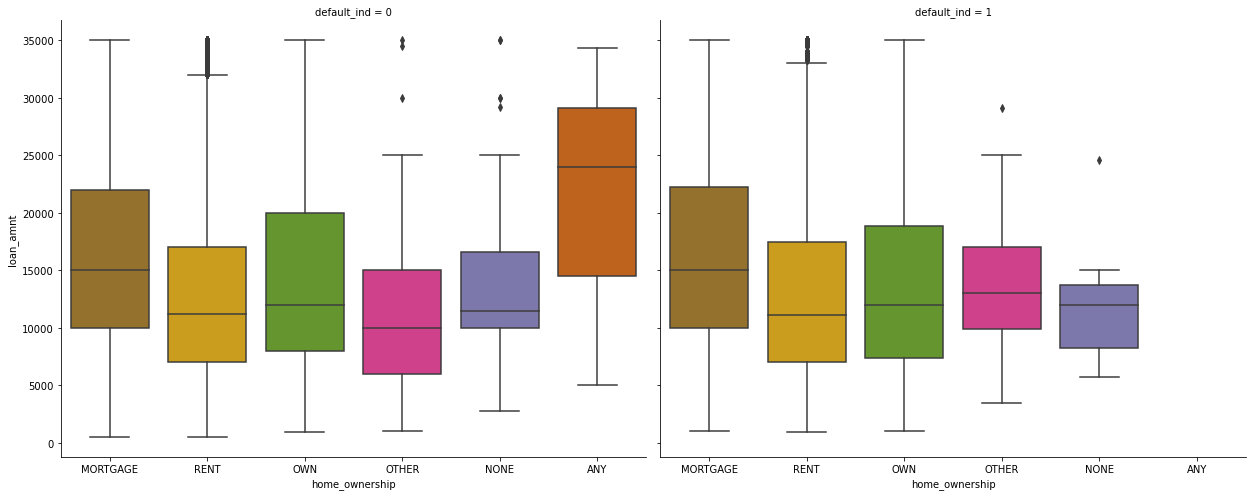

In [143]:
#We will check whether home ownership is having any link with loan amount
plt.figure(figsize=(10,6))
home = sns.catplot(x='home_ownership',y='loan_amnt',data=data,palette="Dark2_r"
                     ,order=data.home_ownership.value_counts().index,kind='box', col = 'default_ind',height=7, aspect=1.25)

1. There is no person who belongs to Any category and is defaulter.
2. The median of other and none category is higher in defaulter case.

In [145]:
#Now we will check is there any relation between default_ind and home_ownership
pd.crosstab(index=data['home_ownership'],columns=data['default_ind'], margins=True)

default_ind,0,1,All
home_ownership,,,
ANY,3,0,3
MORTGAGE,408730,20376,429106
NONE,38,7,45
OTHER,117,27,144
OWN,80001,4135,84136
RENT,320613,21922,342535
All,809502,46467,855969


Number of people who been in any category, most of them are in non-defaulter category while few of them are in default cateogry.